# Problem Statement

Suppose you are working as a Machine Learning Engineer in an e-commerce company named 'Ebuss'. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.

 

With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.

 

As a senior ML Engineer, you are asked to build a model that will improve the recommendations given to the users given their past reviews and ratings. 

 

In order to do this, you planned to build a sentiment-based product recommendation system, which includes the following tasks.

Data sourcing and sentiment analysis
Building a recommendation system
Improving the recommendations using the sentiment analysis model
Deploying the end-to-end project with a user interface
 

Data sourcing and sentiment analysis
In this task, you have to analyse product reviews after some text preprocessing steps and build an ML model to get the sentiments corresponding to the users' reviews and ratings for multiple products. 

 

The steps to be performed for the first task are given below.

1. Exploratory data analysis

2. Data cleaning

3. Text preprocessing

4. Feature extraction: In order to extract features from the text data, you may choose from any of the methods, including bag-of-words, TF-IDF vectorization or word embedding.

5. Training a text classification model: You need to build at least three ML models. You then need to analyse the performance of each of these models and choose the best model. At least three out of the following four models need to be built (Do not forget, if required, handle the class imbalance and perform hyperparameter tuning.). 
 1. Logistic regression
 2. Random forest
 3. XGBoost
 4. Naive Bayes

Out of these four models, you need to select one classification model based on its performance.



In [113]:
#import libraries
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [114]:
!pip install imblearn

In [115]:
# NLTK libraries
import nltk
import string
import time
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from collections import Counter
from sklearn import preprocessing
import warnings
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline
# import scikitplot as skplt
#from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.pipeline import Pipeline

[nltk_data] Downloading package stopwords to C:\Users\Sancharee-
[nltk_data]     Amit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Sancharee-
[nltk_data]     Amit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sancharee-Amit\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:\Users\Sancharee-
[nltk_data]     Amit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Sancharee-
[nltk_data]     Amit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [116]:
#Modelling 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score,f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, 
                             mean_squared_error, log_loss, precision_recall_curve, classification_report, 
                             precision_recall_fscore_support)
from sklearn.metrics.pairwise import pairwise_distances

In [117]:
#load the data
df=pd.read_csv("sample30.csv")
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


# 1. Exploratory Data Analysis

In [118]:
#data overivew
print('rows: ', df.shape[0])
print('columns: ', df.shape[1])
print('\nfeatures: ', df.columns.to_list())
print('\nmissing vlues: ', df.isnull().values.sum())
print('\nUnique values: \n', df.nunique())

rows:  30000
columns:  15

features:  ['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date', 'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating', 'reviews_text', 'reviews_title', 'reviews_userCity', 'reviews_userProvince', 'reviews_username', 'user_sentiment']

missing vlues:  74980

Unique values: 
 id                        271
brand                     214
categories                270
manufacturer              227
name                      271
reviews_date             6857
reviews_didPurchase         2
reviews_doRecommend         2
reviews_rating              5
reviews_text            27282
reviews_title           18535
reviews_userCity          977
reviews_userProvince       42
reviews_username        24914
user_sentiment              2
dtype: int64


In [119]:
#see the data types of different columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [120]:
len(df['brand'].unique())

214

In [121]:
df['brand'].value_counts()

Clorox                   10585
Warner Home Video         3325
Disney                    1200
L'oreal Paris             1186
FOX                        887
                         ...  
Pacific Natural Foods        1
Noosa                        1
Southern Enterprises         1
SLOAN VALVE COMPANY          1
Universal Music              1
Name: brand, Length: 214, dtype: int64

##### Out of all the brands, Clorox is the most widely reviewed  and popular brand followed by Warner Home Video and Disney

##### There are 206 unique brands to be reviewed

In [122]:
len(df['categories'].unique())

270

In [123]:
df['categories'].value_counts()

Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners    8545
Movies, Music & Books,Movies,Action & Adventure,Movies & Music,Movies & TV Shows,Frys                                                                                                                                                                                                                                                                                                                                                                                                   3325
Household Chemicals,Household Cleaners,Bath & 

##### There are 259 categories of products to be reviewed

In [124]:
len(df['name'].unique())

271

In [125]:
df.name.value_counts()

Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                         8545
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                   3325
Clorox Disinfecting Bathroom Cleaner                                              2039
L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz    1186
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)               1143
                                                                                  ... 
5302050 15/16 FCT/HOSE ADAPTOR                                                       1
Clorox Ultimate Care Premium Bleach                                                  1
Pocket Watch Wall Clock Distressed Black - Yosemite Home Decor174                    1
Stonyfield Yobaby Peach & Pear Yogurt 4oz 6 Ct                                       1
Pink Friday: Roman Reloaded Re-Up (w/dvd)                                            1
Name: name, Length: 271, dtype: int64

#### There are total 260 unique products.Out of them Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total has been reviewed the maximum no. of times

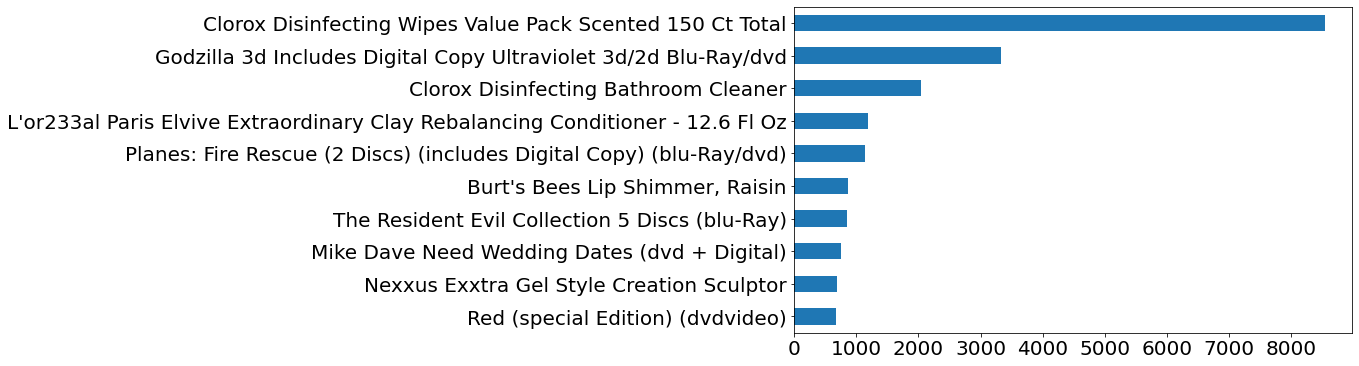

In [126]:
df['name'].value_counts()[0:10].plot(kind='barh', figsize=[10,6], fontsize=20).invert_yaxis()

In [127]:
sorted(df['reviews_rating'].unique())

[1, 2, 3, 4, 5]

### 1.1 Brand Analysis

#### 1.1.1 Let's analyse Clorox's rating

In [128]:
Clorox = df.loc[df['brand'] == 'Clorox',:]
ratings = list(Clorox['reviews_rating'])
print("Average Rating of Clorox is:",sum(ratings)/len(ratings))

Average Rating of Clorox is: 4.824279641001417


#### Thus we see that the Average Rating of Clorox is 4.8 and it is quite a popular and highly rated product

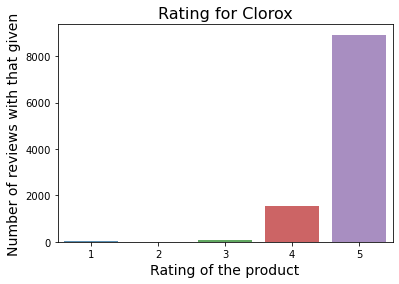

In [129]:
top = Clorox['reviews_rating'].value_counts().index.tolist()
value = Clorox['reviews_rating'].value_counts().values.tolist()
sns.barplot(top, value, alpha=0.8)
plt.xlabel('Rating of the product', fontsize=14)
plt.ylabel('Number of reviews with that given', fontsize=14)
plt.title("Rating for Clorox", fontsize=16)
plt.show()

#### 1.1.2 Let's Analyse Warner Home Video rating


In [130]:
Warner = df.loc[df['brand'] == 'Warner Home Video',:]
ratings = list(Warner['reviews_rating'])
print("Average Rating of Warner Home Video is:",sum(ratings)/len(ratings))

Average Rating of Warner Home Video is: 4.350676691729324


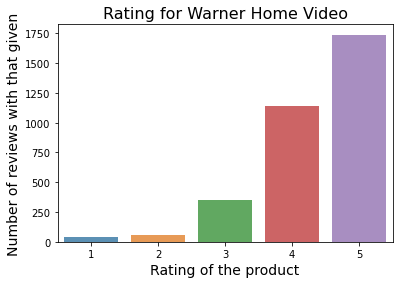

In [131]:
top = Warner['reviews_rating'].value_counts().index.tolist()
value = Warner['reviews_rating'].value_counts().values.tolist()
sns.barplot(top, value, alpha=0.8)
plt.xlabel('Rating of the product', fontsize=14)
plt.ylabel('Number of reviews with that given', fontsize=14)
plt.title("Rating for Warner Home Video", fontsize=16)
plt.show()

### 1.2 Product Name Analysis

#### 1.2.1 Analysis for Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total

In [132]:
CloroxWipes = df.loc[df['name'] == 'Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total',:]
ratings = list(CloroxWipes['reviews_rating'])
print("Average Rating of CloroxWipes is:",sum(ratings)/len(ratings))

Average Rating of CloroxWipes is: 4.820479812755997


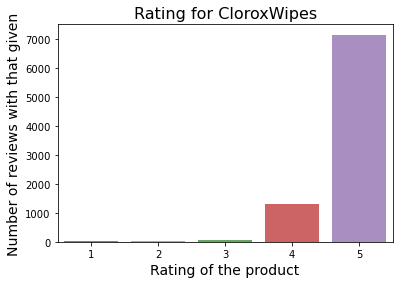

In [133]:
top = CloroxWipes['reviews_rating'].value_counts().index.tolist()
value = CloroxWipes['reviews_rating'].value_counts().values.tolist()
sns.barplot(top, value, alpha=0.8)
plt.xlabel('Rating of the product', fontsize=14)
plt.ylabel('Number of reviews with that given', fontsize=14)
plt.title("Rating for CloroxWipes", fontsize=16)
plt.show()

### 1.3 Average Number of words per review

In [134]:
totalreviews = list(df['reviews_text'])
length = []
for i in range(0,len(totalreviews)):
        totalreviews[i] = str(totalreviews[i])
        a = len(totalreviews[i].split(' '))
        length.append(a)

    
print("On average a review has about:", sum(length)/len(length),"words in them")

On average a review has about: 34.38636666666667 words in them


#### There are 34 words on  an average in a review

In [135]:
len(ratings)
len(length)
df.shape

num_rating=list(df.reviews_rating)
len(num_rating)

30000

### 1.4 Average Number of words per rating

In [136]:
dt = pd.DataFrame()
dt['length'] =  length
dt['ratings'] =  num_rating
five_star = dt.loc[dt['ratings'] == 5,:]
five = sum(five_star['length'])/len(five_star['length'])
four_star = dt.loc[dt['ratings'] == 4,:]
four = sum(four_star['length'])/len(four_star['length'])
three_star = dt.loc[dt['ratings'] == 3,:]
three = sum(three_star['length'])/len(three_star['length'])
to_star = dt.loc[dt['ratings'] == 2,:]
to = sum(to_star['length'])/len(to_star['length'])
on_star = dt.loc[dt['ratings'] == 1,:]
on = sum(on_star['length'])/len(on_star['length'])

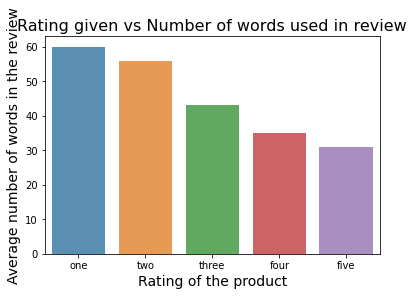

In [137]:
colors = ['gold', 'orange','yellowgreen', 'lightcoral', 'lightskyblue']
top = ['one','two','three','four','five']
value = [int(on), int(to),int(three),int(four),int(five)]
sns.barplot(top, value, alpha=0.8)
plt.xlabel('Rating of the product', fontsize=14)
plt.ylabel('Average number of words in the review', fontsize=14)
plt.title("Rating given vs Number of words used in review", fontsize=16)
plt.show()

##### Five star ratings are the shortest whereas One star ratings are the longest having on a average 50 words

### 1.5 Array of all words used in 5 star rating

In [138]:
f = df.loc[df['reviews_rating'] == 5,:]
ss = list(f['reviews_text'])
aa=[]
for i in range(0,len(ss)):
    ss[i] = str(ss[i])
    aa.append(ss[i].split(' '))

In [139]:
all_words_5 = [j for i in aa for j in i]
all_words_5

['i',
 'love',
 'this',
 'album.',
 "it's",
 'very',
 'good.',
 'more',
 'to',
 'the',
 'hip',
 'hop',
 'side',
 'than',
 'her',
 'current',
 'pop',
 'sound..',
 'SO',
 'HYPE!',
 'i',
 'listen',
 'to',
 'this',
 'everyday',
 'at',
 'the',
 'gym!',
 'i',
 'give',
 'it',
 '5star',
 'rating',
 'all',
 'the',
 'way.',
 'her',
 'metaphors',
 'are',
 'just',
 'crazy.',
 'Good',
 'flavor.',
 'This',
 'review',
 'was',
 'collected',
 'as',
 'part',
 'of',
 'a',
 'promotion.',
 'Good',
 'flavor.',
 'Loved',
 'This',
 'review',
 'was',
 'collected',
 'as',
 'part',
 'of',
 'a',
 'promotion.',
 'This',
 'is',
 'a',
 'good',
 'product.',
 'Will',
 'give',
 'you',
 'a',
 'great',
 'feeling.',
 'I',
 'really',
 'enjoyed',
 'using',
 'this',
 'product',
 'with',
 'my',
 'husband.',
 'After',
 '20+',
 'years',
 'of',
 'marriage,',
 'things',
 'can',
 'tend',
 'to',
 'get',
 'a',
 'little',
 'tired',
 'and',
 'boring.',
 'This',
 'was',
 'just',
 'the',
 'thing',
 'we',
 'needed',
 'to',
 'shake',
 'th

### 1.6 Distribution of ratings

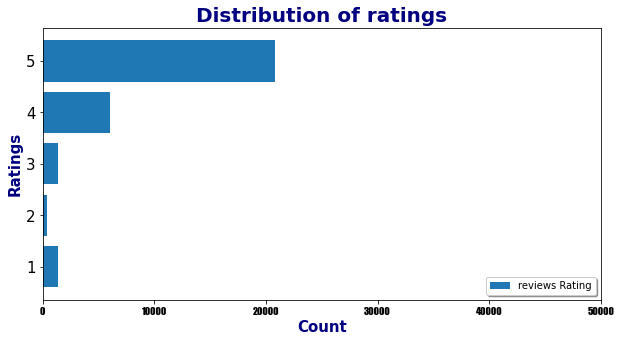

In [140]:
#plot ratings frequency
plt.figure(figsize=[10,5]) #[width, height]
x = list(df['reviews_rating'].value_counts().index)
y = list(df['reviews_rating'].value_counts())
plt.barh(x, y)

ticks_x = np.linspace(0, 50000, 6) # (start, end, no of ticks)
plt.xticks(ticks_x, fontsize=10, family='fantasy', color='black')
plt.yticks(size=15)

plt.title('Distribution of ratings', fontsize=20, weight='bold', color='navy', loc='center')
plt.xlabel('Count', fontsize=15, weight='bold', color='navy')
plt.ylabel('Ratings', fontsize=15, weight='bold', color='navy')
plt.legend(['reviews Rating'], shadow=True, loc=4)
#Loc =1 topright, loc=2 topleft, loc=3 bottomleft, loc=4 bottom right, loc=9 topmiddle
#plt.grid() #add grid lines

In [141]:
df.reviews_rating.value_counts()

5    20831
4     6020
1     1384
3     1345
2      420
Name: reviews_rating, dtype: int64

##### Maximum reviews are 5 star while and the least occuring rating is 2 star

### 1.7 Most frequently used words in review

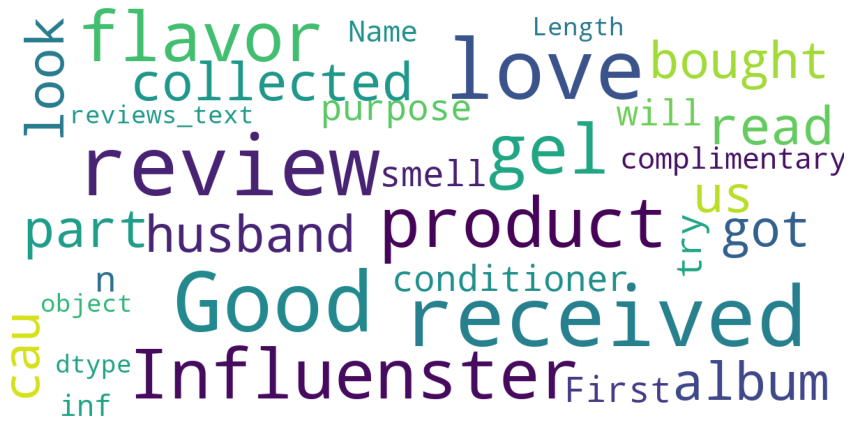

In [142]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title=None):
    wordcloud = WordCloud(
        background_color = 'white',
        stopwords = stopwords,
        max_words=300,
        max_font_size=40,
        scale=3,
        random_state=1 ).generate(str(data))
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title:
        fig.subtitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    
    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(df['reviews_text'])    

# 2. Data Cleaning

### Missing Value Imputation

In [143]:
#see the sum of missing values in each columns
df.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

##### For the task of sentiment classification the target column is user_sentiment which has one missing value.Hence we would be dropping that

In [144]:
df.dropna(subset=['user_sentiment'], inplace=True)

In [145]:
df.shape

(29999, 15)

### Removing Duplicate entries for ratings for a particular product and user

In [146]:
#  df=df[ (df.duplicated(subset=['reviews_username','name','reviews_date'], keep=False))]

In [147]:
df

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-23T00:00:00.000Z,False,True,5,I got this conditioner with Influenster to try...,Softness!!,NaN,NaN,laurasnchz,Positive
29996,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-27T00:00:00.000Z,False,True,5,"I love it , I received this for review purpose...",I love it,NaN,NaN,scarlepadilla,Positive
29997,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-21T00:00:00.000Z,False,True,5,First of all I love the smell of this product....,Hair is so smooth after use,NaN,NaN,liviasuexo,Positive
29998,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-11T00:00:00.000Z,False,True,5,I received this through Influenster and will n...,Perfect for my oily hair!,NaN,NaN,ktreed95,Positive


In [148]:
df = df.drop_duplicates(
  subset = ['reviews_username','name','reviews_date'],
  keep = 'last').reset_index(drop = True)

In [149]:
df

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
2,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-04-20T00:00:00.000Z,False,False,1,My boyfriend and I bought this to spice things...,Not worth it,NaN,NaN,samantha,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29835,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-23T00:00:00.000Z,False,True,5,I got this conditioner with Influenster to try...,Softness!!,NaN,NaN,laurasnchz,Positive
29836,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-27T00:00:00.000Z,False,True,5,"I love it , I received this for review purpose...",I love it,NaN,NaN,scarlepadilla,Positive
29837,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-21T00:00:00.000Z,False,True,5,First of all I love the smell of this product....,Hair is so smooth after use,NaN,NaN,liviasuexo,Positive
29838,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-11T00:00:00.000Z,False,True,5,I received this through Influenster and will n...,Perfect for my oily hair!,NaN,NaN,ktreed95,Positive


##### So now the df has 2099 rows for unique product -user rating

### Concatenating the reviews_title and reviews_text columns

In [150]:
df['reviews'] = df['reviews_title'].astype(str)+' - '+df['reviews_text']

In [151]:
df=df.drop(['reviews_title', 'reviews_text'], axis=1)


In [152]:
df.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_userCity', 'reviews_userProvince', 'reviews_username',
       'user_sentiment', 'reviews'],
      dtype='object')

In [153]:
df

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,reviews
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,Los Angeles,NaN,joshua,Positive,Just Awesome - i love this album. it's very go...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,NaN,NaN,dorothy w,Positive,Good - Good flavor.
2,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,NaN,NaN,rebecca,Negative,Disappointed - I read through the reviews on h...
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,NaN,NaN,walker557,Negative,Irritation - My husband bought this gel for us...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-04-20T00:00:00.000Z,False,False,1,NaN,NaN,samantha,Negative,Not worth it - My boyfriend and I bought this ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29835,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-23T00:00:00.000Z,False,True,5,NaN,NaN,laurasnchz,Positive,Softness!! - I got this conditioner with Influ...
29836,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-27T00:00:00.000Z,False,True,5,NaN,NaN,scarlepadilla,Positive,"I love it - I love it , I received this for re..."
29837,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-21T00:00:00.000Z,False,True,5,NaN,NaN,liviasuexo,Positive,Hair is so smooth after use - First of all I l...
29838,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-11T00:00:00.000Z,False,True,5,NaN,NaN,ktreed95,Positive,Perfect for my oily hair! - I received this th...


## Label Encoding Target Variable:

In [154]:
label_encoder = preprocessing.LabelEncoder()
df['user_sentiment']= label_encoder.fit_transform(df['user_sentiment'])

### Creating dataframe with columns needed for sentiment classification

In [155]:
review = df[['reviews','user_sentiment']]

In [156]:
review.head()

,reviews,user_sentiment
0,Just Awesome - i love this album. it's very go...,1
1,Good - Good flavor.,1
2,Disappointed - I read through the reviews on h...,0
3,Irritation - My husband bought this gel for us...,0
4,Not worth it - My boyfriend and I bought this ...,0


## 3. Text Preprocessing

1. Lower casing
2. removal of punctuation
3. removing stopwords
4. tokenization
5. stemming and lemmatization
6. tf idf vectorizer

In [157]:
#lower casing
review.reviews=review.reviews.apply(lambda x :x.lower())

In [158]:
review.reviews

0        just awesome - i love this album. it's very go...
1                                      good - good flavor.
2        disappointed - i read through the reviews on h...
3        irritation - my husband bought this gel for us...
4        not worth it - my boyfriend and i bought this ...
                               ...                        
29835    softness!! - i got this conditioner with influ...
29836    i love it - i love it , i received this for re...
29837    hair is so smooth after use - first of all i l...
29838    perfect for my oily hair! - i received this th...
29839    conditioned into healthy - i received this pro...
Name: reviews, Length: 29840, dtype: object

In [159]:
#punctuation removal
punctuations = list(string.punctuation)
# review.reviews_text=review.reviews_text.apply(lambda x: " ".join(x for x in x.split() if x not in punctuations))
review.reviews =  review.reviews.str.replace('[^\w\s]','')

In [160]:
review.reviews

0        just awesome  i love this album its very good ...
1                                        good  good flavor
2        disappointed  i read through the reviews on he...
3        irritation  my husband bought this gel for us ...
4        not worth it  my boyfriend and i bought this t...
                               ...                        
29835    softness  i got this conditioner with influens...
29836    i love it  i love it  i received this for revi...
29837    hair is so smooth after use  first of all i lo...
29838    perfect for my oily hair  i received this thro...
29839    conditioned into healthy  i received this prod...
Name: reviews, Length: 29840, dtype: object

In [161]:
review.reviews[1]

'good  good flavor'

## Identifying and Remove Stop Words
- A stop word is a commonly used word (such as “the”, “a”, “an”, “in”). 
- Removal of stopwords is necessary since they add noise without having any informational value in modeling.

In [162]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Sancharee-
[nltk_data]     Amit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [163]:
stop = stopwords.words('english')
stop[0:10]
print('Total stop words:',len(stop))

Total stop words: 179


__Removing stopwords from reviews:__

In [164]:
review.reviews= review.reviews.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [165]:
review.reviews[1]

'good good flavor'

### Tokenize Text in Words
- Tokenizing text is important since text can’t be processed without tokenization. Tokenization process means splitting bigger parts to small parts.
- You can tokenize paragraphs to sentences and tokenize sentences to words according to your needs. 
- NLTK is shipped with sentence tokenizer and word tokenizer.
- Non english text can also be tokenized by specifying the language

In [166]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Sancharee-
[nltk_data]     Amit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

__Word Tokenizing:__

In [167]:
review['review_tokenized'] = review.reviews.apply(lambda x: word_tokenize(x))

In [168]:
review['review_tokenized'].head()

0    [awesome, love, album, good, hip, hop, side, c...
1                                 [good, good, flavor]
2    [disappointed, read, reviews, looking, buying,...
3    [irritation, husband, bought, gel, us, gel, ca...
4    [worth, boyfriend, bought, spice, things, bedr...
Name: review_tokenized, dtype: object

### Lemmatizing Words Using [WordNet](https://wordnet.princeton.edu/)

__Wordnet:__
- WordNet is a lexical database for the English language.
- It groups English words into sets of synonyms called synsets, provides short definitions and usage examples, and records a number of relations among these synonym sets or their members. 
- WordNet can thus be seen as a combination of dictionary and thesaurus. While it is accessible to human users via a web browser, its primary use is in automatic text analysis and artificial intelligence applications.

__Lemmatization:__
- Lemmatization is a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices. 
- It makes use of the vocabulary and does a morphological analysis to obtain the root word. Therefore, we usually prefer using lemmatization over stemming.
- Example: reduce words such as “am”, “are”, and “is” to a common form such as “be”

In [169]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Sancharee-
[nltk_data]     Amit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [170]:
lemmatizer = WordNetLemmatizer()

In [171]:
review['review_lemmatized'] = review.review_tokenized.apply(lambda x: [lemmatizer.lemmatize(word,pos="v") for word in x])

In [172]:
review['review_tokenized'].head()

0    [awesome, love, album, good, hip, hop, side, c...
1                                 [good, good, flavor]
2    [disappointed, read, reviews, looking, buying,...
3    [irritation, husband, bought, gel, us, gel, ca...
4    [worth, boyfriend, bought, spice, things, bedr...
Name: review_tokenized, dtype: object

In [173]:
review['review_lemmatized'].head()

0    [awesome, love, album, good, hip, hop, side, c...
1                                 [good, good, flavor]
2    [disappoint, read, review, look, buy, one, cou...
3    [irritation, husband, buy, gel, us, gel, cause...
4    [worth, boyfriend, buy, spice, things, bedroom...
Name: review_lemmatized, dtype: object

In [174]:
reviewlist=review['review_lemmatized'].tolist()
wordlist = [y for x in reviewlist for y in x]
wordlist

['awesome',
 'love',
 'album',
 'good',
 'hip',
 'hop',
 'side',
 'current',
 'pop',
 'sound',
 'hype',
 'listen',
 'everyday',
 'gym',
 'give',
 '5star',
 'rat',
 'way',
 'metaphors',
 'crazy',
 'good',
 'good',
 'flavor',
 'disappoint',
 'read',
 'review',
 'look',
 'buy',
 'one',
 'couple',
 'lubricants',
 'ultimately',
 'disappoint',
 'didnt',
 'even',
 'live',
 'review',
 'read',
 'starters',
 'neither',
 'boyfriend',
 'could',
 'notice',
 'sort',
 'enhance',
 'captivate',
 'sensation',
 'notice',
 'however',
 'messy',
 'consistency',
 'reminiscent',
 'liquidy',
 'vaseline',
 'difficult',
 'clean',
 'pleasant',
 'especially',
 'since',
 'lack',
 'captivate',
 'sensation',
 'expect',
 'im',
 'disappoint',
 'pay',
 'much',
 'lube',
 'wont',
 'use',
 'could',
 'use',
 'normal',
 'personal',
 'lubricant',
 '1',
 'less',
 'money',
 '2',
 'less',
 'mess',
 'irritation',
 'husband',
 'buy',
 'gel',
 'us',
 'gel',
 'cause',
 'irritation',
 'felt',
 'like',
 'burn',
 'skin',
 'wouldnt',
 '

In [175]:
print('Number of total words in corpus',len(wordlist))

Number of total words in corpus 593351


__Initialize word frequency counter:__

In [176]:
word_counter = Counter(wordlist)

__Pick top 30 most common words:__

In [177]:
most_common_words = word_counter.most_common()[:30]
most_common_words = pd.DataFrame(most_common_words)
most_common_words.columns = ['word', 'freq']
most_common_words

,word,freq
0,great,14881
1,use,13755
2,love,13035
3,product,10774
4,review,9485
5,movie,9332
6,part,9174
7,clean,8932
8,collect,8760
9,promotion,8735


<AxesSubplot:ylabel='word'>

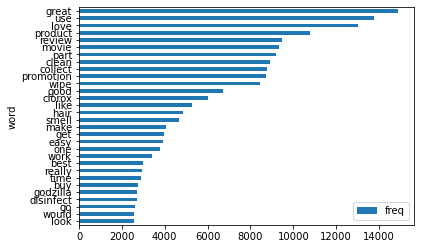

In [178]:
# plotting the frequency graph
most_common_words.sort_values(by='freq',ascending=True).plot(x='word', kind='barh')

__Sort the word counts and plot their values on Logarithmic axes to check the shape of the distribution:__
- This visualization is particularly useful if comparing 2 or more datasets
- A flatter distribution indicates a large vocabulary while a peaked distribution a restricted vocabulary often due to a focused topic or specialized language.

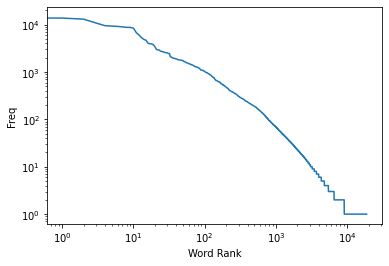

In [179]:
sorted_word_counts = sorted(list(word_counter.values()), reverse=True)

plt.loglog(sorted_word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank");

__Histogram of sorted_word_counts:__
- Displays how many words have a count in a specific range.
- The distribution is highly peaked at low counts, i.e. most of the words appear which a low count, so we better display it on semilogarithmic axes to inspect the tail of the distribution.

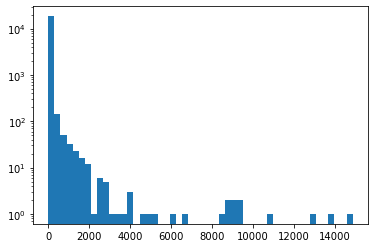

In [180]:
plt.hist(sorted_word_counts, bins=50, log=True);

In [181]:
most_common_words.word.tolist()[:30]

['great',
 'use',
 'love',
 'product',
 'review',
 'movie',
 'part',
 'clean',
 'collect',
 'promotion',
 'wipe',
 'good',
 'clorox',
 'like',
 'hair',
 'smell',
 'make',
 'get',
 'easy',
 'one',
 'work',
 'best',
 'really',
 'time',
 'buy',
 'godzilla',
 'disinfect',
 'go',
 'would',
 'look']

# 4. Feature Extraction

In [182]:
review['review_lemmatized_train']=review.review_lemmatized.apply(lambda x: ' '.join(x))

In [183]:
review.head()

,reviews,user_sentiment,review_tokenized,review_lemmatized,review_lemmatized_train
0,awesome love album good hip hop side current p...,1,"[awesome, love, album, good, hip, hop, side, c...","[awesome, love, album, good, hip, hop, side, c...",awesome love album good hip hop side current p...
1,good good flavor,1,"[good, good, flavor]","[good, good, flavor]",good good flavor
2,disappointed read reviews looking buying one c...,0,"[disappointed, read, reviews, looking, buying,...","[disappoint, read, review, look, buy, one, cou...",disappoint read review look buy one couple lub...
3,irritation husband bought gel us gel caused ir...,0,"[irritation, husband, bought, gel, us, gel, ca...","[irritation, husband, buy, gel, us, gel, cause...",irritation husband buy gel us gel cause irrita...
4,worth boyfriend bought spice things bedroom hi...,0,"[worth, boyfriend, bought, spice, things, bedr...","[worth, boyfriend, buy, spice, things, bedroom...",worth boyfriend buy spice things bedroom highl...


### Defining Target and Feature variables

In [184]:
x = (review['review_lemmatized_train'])
y = (review['user_sentiment'])

In [185]:
no_of_classes= len(pd.Series(y).value_counts())

In [186]:
pd.Series(y).value_counts()

1    26493
0     3347
Name: user_sentiment, dtype: int64

In [187]:
### Checking the Distribution of target variable
positive = (sum(review['user_sentiment'])/len(review['user_sentiment'].index))*100
positive

88.78351206434316

##### Here we can clearly see there is a class imbalance in the distribution of target variable

### Splitting into Train and test datasets

In [188]:
# Split the dataset into test and train
seed = 50 

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=seed)

### Tf-Idf Vectorization

In [189]:
from sklearn.feature_extraction.text import TfidfVectorizer
word_vectorizer = TfidfVectorizer()


In [190]:
## transforming the train and test datasets
X_train_transformed = word_vectorizer.fit_transform(X_train.tolist())
X_test_transformed = word_vectorizer.transform(X_test.tolist())

# # Print the shape of each dataset.
print('X_train_transformed', X_train_transformed.shape)
print('y_train', y_train.shape)
print('X_test_transformed', X_test_transformed.shape)
print('y_test', y_test.shape)

X_train_transformed (20888, 15690)
y_train (20888,)
X_test_transformed (8952, 15690)
y_test (8952,)


In [191]:
# get feature names
feature_names = np.array(word_vectorizer.get_feature_names())
sorted_by_idf = np.argsort(word_vectorizer.idf_)
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:10]]))
print("\nFeatures with highest idf:\n{}".format(
       feature_names[sorted_by_idf[-10:]]))

Features with lowest idf:
['great' 'love' 'use' 'review' 'part' 'collect' 'promotion' 'product'
 'clean' 'wipe']

Features with highest idf:
['holders' 'holdfor' 'holdouts' 'holdsoft' 'hollywoodagain' 'hologram'
 'holsom' 'holtz' 'holdalso' 'zyrtec']


## 5. Modelling

In [192]:
def plot_pre_curve(y_test,probs):
    precision, recall, thresholds = precision_recall_curve(y_test, probs)
    plt.plot([0, 1], [0.5, 0.5], linestyle='--')
    # plot the precision-recall curve for the model
    plt.plot(recall, precision, marker='.')
    plt.title("precision recall curve")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the plot
    plt.show()
    
def plot_roc(y_test,probs):
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    # plot no skill
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    plt.title("ROC curve")
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    # show the plot
    plt.show()

## 5.1 Logistic Regression

#### Handling class imbalance using SMOTE

In [193]:
counter = Counter(y_train)
print('Before',counter)

sm = SMOTE()

# transform the dataset
X_train_transformed_sm, y_train_sm = sm.fit_resample(X_train_transformed, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({1: 18540, 0: 2348})
After Counter({1: 18540, 0: 18540})


#### Building the model

In [194]:
# Building the Logistic Regression model
logit_sm = LogisticRegression()
logit_sm.fit(X_train_transformed_sm,y_train_sm)



LogisticRegression()

#### Model performance on train data

In [195]:
# Prediction Train Data
y_pred_train_sm= logit_sm.predict(X_train_transformed_sm)

#Model Performance on Train Dataset
print("Logistic Regression accuracy", accuracy_score(y_pred_train_sm, y_train_sm))
print(classification_report(y_pred_train_sm, y_train_sm))
print(confusion_matrix(y_pred_train_sm, y_train_sm))

Logistic Regression accuracy 0.9286138079827401
              precision    recall  f1-score   support

           0       0.96      0.91      0.93     19599
           1       0.90      0.95      0.93     17481

    accuracy                           0.93     37080
   macro avg       0.93      0.93      0.93     37080
weighted avg       0.93      0.93      0.93     37080

[[17746  1853]
 [  794 16687]]


#### Model performance on test data


In [196]:
# Prediction Test Data
y_pred_test = logit_sm.predict(X_test_transformed)

print("Logistic Regression accuracy", accuracy_score(y_pred_test, y_test))
print(classification_report(y_pred_test, y_test))
print(confusion_matrix(y_pred_test, y_test))

Logistic Regression accuracy 0.8659517426273459
              precision    recall  f1-score   support

           0       0.74      0.44      0.55      1677
           1       0.88      0.96      0.92      7275

    accuracy                           0.87      8952
   macro avg       0.81      0.70      0.74      8952
weighted avg       0.86      0.87      0.85      8952

[[ 738  939]
 [ 261 7014]]


In [197]:
prob_test  = logit_sm.predict_proba(X_test_transformed)
prob_train = logit_sm.predict_proba(X_train_transformed_sm)

In [198]:
auc_score = roc_auc_score(y_train_sm, prob_train[:,1])
print ("Model ROC-AUC score for training sample: %.3f" \
                                      % auc_score)
auc_score = roc_auc_score(y_test, prob_test[:,1])
print ("Model ROC-AUC score for test sample: %.3f" \
                                      % auc_score)

Model ROC-AUC score for training sample: 0.976
Model ROC-AUC score for test sample: 0.910


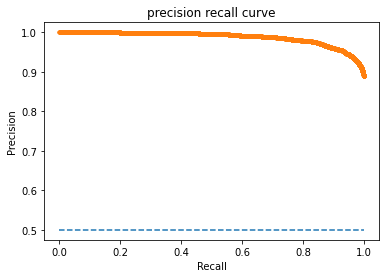

In [199]:
plot_pre_curve(y_test,prob_test[:,1])

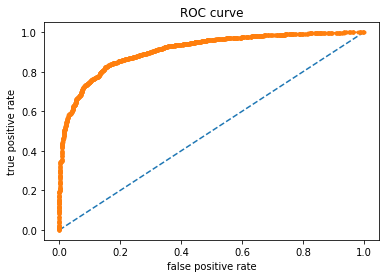

In [200]:
plot_roc(y_test,prob_test[:,1])

## 5.2 Random forest Classifier

#### Handling class imbalance using oversampling

In [201]:
#from imblearn import over_sampling
from imblearn import over_sampling
ros = over_sampling.RandomOverSampler(random_state=0)


In [202]:
counter = Counter(y_train)
print('Before over_sampling',counter)
# X_train_transformed_sm, y_train_sm = sm.fit_resample(X_train_transformed, y_train)

# Oversampling the dataset.
X_train_transformed_ros, y_train_ros = ros.fit_resample(X_train_transformed, y_train)
counter = Counter(y_train_ros)
print('After over_sampling',counter)

Before over_sampling Counter({1: 18540, 0: 2348})
After over_sampling Counter({1: 18540, 0: 18540})


#### Building the Random Forest model

In [203]:
# Building Random Forest Model.
classifier = RandomForestClassifier(n_estimators=100, random_state=seed, n_jobs=-1)
classifier.fit(X_train_transformed_ros,y_train_ros)


RandomForestClassifier(n_jobs=-1, random_state=50)

#### Prediction on Train Data

In [204]:
# Prediction Train Data
y_pred_train_ros= classifier.predict(X_train_transformed_ros)

print("Random Forest Model accuracy", accuracy_score(y_pred_train_ros, y_train_ros))
print(classification_report(y_pred_train_ros, y_pred_train_ros))

Random Forest Model accuracy 0.9999730312837108
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18541
           1       1.00      1.00      1.00     18539

    accuracy                           1.00     37080
   macro avg       1.00      1.00      1.00     37080
weighted avg       1.00      1.00      1.00     37080



#### Prediction on Test Data

In [205]:
# Prediction Test Data
y_pred_test = classifier.predict(X_test_transformed)

print("Random Forest Model accuracy", accuracy_score(y_pred_test, y_test))
print(classification_report(y_pred_test, y_test))

Random Forest Model accuracy 0.9206881143878463
              precision    recall  f1-score   support

           0       0.36      0.84      0.50       421
           1       0.99      0.92      0.96      8531

    accuracy                           0.92      8952
   macro avg       0.67      0.88      0.73      8952
weighted avg       0.96      0.92      0.94      8952



In [206]:
prob_test_rf  = classifier.predict_proba(X_test_transformed)
prob_train_rf = classifier.predict_proba(X_train_transformed_ros)

#### Model Evaluation

In [207]:
auc_score = roc_auc_score(y_train_ros, prob_train_rf[:,1])
print ("Model ROC-AUC score for training sample: %.3f" \
                                      % auc_score)
auc_score = roc_auc_score(y_test, prob_test_rf[:,1])
print ("Model ROC-AUC score for test sample: %.3f" \
                                      % auc_score)

Model ROC-AUC score for training sample: 1.000
Model ROC-AUC score for test sample: 0.908


In [208]:
#Calculate train and test accuracy
train_acc = accuracy_score(y_train_ros, y_pred_train_ros)
test_acc  = accuracy_score(y_test, y_pred_test)
print ("Train Accuracy :: ", train_acc)
print ("Test Accuracy :: ", test_acc)

Train Accuracy ::  0.9999730312837108
Test Accuracy ::  0.9206881143878463


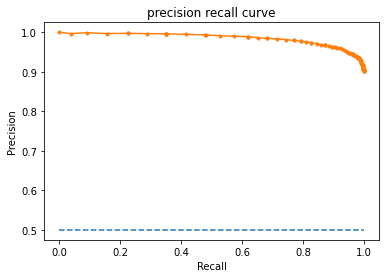

In [209]:
plot_pre_curve(y_test,prob_test_rf[:,1])

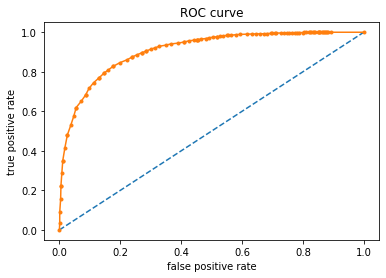

In [210]:
plot_roc(y_test,prob_test_rf[:,1])

## 5.3 XGBoost

In [211]:
xgbclf = XGBClassifier(random_state=42, seed=2, colsample_bytree=0.6, subsample=0.7, 
                    n_estimators=300)



In [212]:
xgbclf.fit(X_train_transformed_sm,y_train_sm)

[16:06:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=2,
              subsample=0.7, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [213]:
# Prediction Train Data
y_pred_train_xgb= xgbclf.predict(X_train_transformed_sm)

print("XGBoost Model accuracy", accuracy_score(y_pred_train_xgb, y_train_sm))
print(classification_report(y_pred_train_xgb, y_train_sm))

XGBoost Model accuracy 0.9811488673139158
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18505
           1       0.98      0.98      0.98     18575

    accuracy                           0.98     37080
   macro avg       0.98      0.98      0.98     37080
weighted avg       0.98      0.98      0.98     37080



In [214]:
# Prediction Test Data
y_pred_test_xgb = xgbclf.predict(X_test_transformed)

print("XGBoost Model accuracy", accuracy_score(y_pred_test_xgb, y_test))
print(classification_report(y_pred_test_xgb, y_test))

XGBoost Model accuracy 0.9053842716711349
              precision    recall  f1-score   support

           0       0.55      0.58      0.57       952
           1       0.95      0.94      0.95      8000

    accuracy                           0.91      8952
   macro avg       0.75      0.76      0.76      8952
weighted avg       0.91      0.91      0.91      8952



In [215]:
prob_test_xgb  = xgbclf.predict_proba(X_test_transformed)
prob_train_xgb = xgbclf.predict_proba(X_train_transformed_sm)
prob_test_xgb

array([[7.6718926e-03, 9.9232811e-01],
       [5.8126450e-04, 9.9941874e-01],
       [4.4824004e-02, 9.5517600e-01],
       ...,
       [1.9350290e-02, 9.8064971e-01],
       [4.2556882e-02, 9.5744312e-01],
       [1.9046187e-02, 9.8095381e-01]], dtype=float32)

In [216]:
auc_score = roc_auc_score(y_train_sm, prob_train_xgb[:,1])
print ("Model ROC-AUC score for training sample: %.3f" \
                                      % auc_score)
auc_score = roc_auc_score(y_test, prob_test_xgb[:,1])
print ("Model ROC-AUC score for test sample: %.3f" \
                                      % auc_score)

Model ROC-AUC score for training sample: 0.998
Model ROC-AUC score for test sample: 0.906


In [217]:
#Calculate train and test accuracy
train_acc = accuracy_score(y_train_sm, y_pred_train_xgb)
test_acc  = accuracy_score(y_test, y_pred_test_xgb)
print ("Train Accuracy :: ", train_acc)
print ("Test Accuracy :: ", test_acc)

Train Accuracy ::  0.9811488673139158
Test Accuracy ::  0.9053842716711349


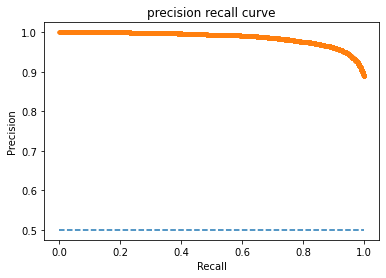

In [218]:
plot_pre_curve(y_test,prob_test_xgb[:,1])

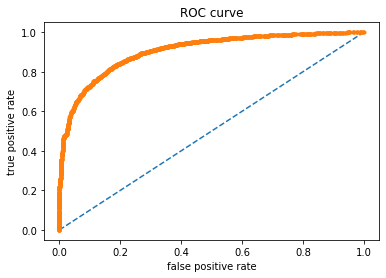

In [219]:
plot_roc(y_test,prob_test_xgb[:,1])

# Model Comparison

### Scoring all the models fitted

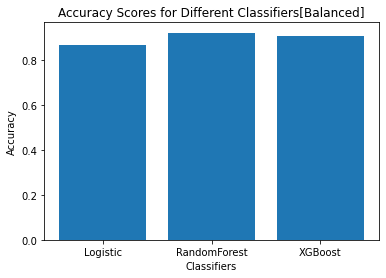

<Figure size 504x504 with 0 Axes>

0.8659517426273459
0.9206881143878463
0.9053842716711349


In [220]:
classifiers = ["Logistic","RandomForest","XGBoost"]

logit_score = logit_sm.score(X_test_transformed, y_test)

rf_score = classifier.score(X_test_transformed, y_test)

xgb_score = xgbclf.score(X_test_transformed, y_test)



scores =[logit_score,rf_score,xgb_score ]

plt.bar(classifiers,scores)
plt.title("Accuracy Scores for Different Classifiers[Balanced]")
plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
# plt.savefig("./plots/accuracy[Balanced].png")
plt.figure(figsize=(7,7))
plt.show()

print(logit_score)
print(rf_score)
print(xgb_score)


#### Since the F1 score of XGBoost model is highest for both the classes 0 and1 we select the XgBoost model

### Saving the trained models as pickle file

In [221]:
import pickle

#### Save the tf-idf vectorizer to disk

In [222]:
# save the classification model to disk
features = 'feature_model.pkl'
pickle.dump(word_vectorizer, open('./models/feature_model.pkl', 'wb'))

#### Save the sentiment classification model to disk

In [223]:
# save the classification model to disk

pickle.dump(xgbclf, open('./models/xgboost_model.pkl', 'wb'))

# Building a recommendation system 

- User based recommendation
- User based prediction & evaluation
- Item based recommendation
- Item based prediction & evaluation

### Creating dataframe with columns needed for building a recommendation system

In [224]:
df.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_userCity', 'reviews_userProvince', 'reviews_username',
       'user_sentiment', 'reviews'],
      dtype='object')

In [225]:
df.dtypes

id                      object
brand                   object
categories              object
manufacturer            object
name                    object
reviews_date            object
reviews_didPurchase     object
reviews_doRecommend     object
reviews_rating           int64
reviews_userCity        object
reviews_userProvince    object
reviews_username        object
user_sentiment           int32
reviews                 object
dtype: object

In [226]:
# df['productid']= label_encoder.fit_transform(df['name'])
# df['userid']= label_encoder.fit_transform(df['reviews_username'])

In [227]:
# df['productid']=df['name'].astype('category').cat.codes
# df['userid']=df['reviews_username'].astype('category').cat.codes

In [228]:
df.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_userCity', 'reviews_userProvince', 'reviews_username',
       'user_sentiment', 'reviews'],
      dtype='object')

In [229]:
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,reviews
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,Los Angeles,NaN,joshua,1,Just Awesome - i love this album. it's very go...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,NaN,NaN,dorothy w,1,Good - Good flavor.
2,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,NaN,NaN,rebecca,0,Disappointed - I read through the reviews on h...
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,NaN,NaN,walker557,0,Irritation - My husband bought this gel for us...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-04-20T00:00:00.000Z,False,False,1,NaN,NaN,samantha,0,Not worth it - My boyfriend and I bought this ...


#### Create a lookup frame so we can get the product names and user name back in readable form later.

In [230]:
# item_lookup = df[['productid', 'name']].drop_duplicates()
# item_lookup['productid'] = item_lookup.productid.astype(str)

In [231]:
# item_lookup

In [232]:
# user_lookup = df[['userid', 'reviews_username']].drop_duplicates()
# user_lookup['userid'] = user_lookup['userid'].astype(str)

In [233]:
# user_lookup

In [234]:
ratings=df[['name','reviews_username','reviews_rating']]

In [235]:
ratings

,name,reviews_username,reviews_rating
0,Pink Friday: Roman Reloaded Re-Up (w/dvd),joshua,5
1,Lundberg Organic Cinnamon Toast Rice Cakes,dorothy w,5
2,K-Y Love Sensuality Pleasure Gel,rebecca,1
3,K-Y Love Sensuality Pleasure Gel,walker557,1
4,K-Y Love Sensuality Pleasure Gel,samantha,1
...,...,...,...
29835,L'or233al Paris Elvive Extraordinary Clay Reba...,laurasnchz,5
29836,L'or233al Paris Elvive Extraordinary Clay Reba...,scarlepadilla,5
29837,L'or233al Paris Elvive Extraordinary Clay Reba...,liviasuexo,5
29838,L'or233al Paris Elvive Extraordinary Clay Reba...,ktreed95,5


In [236]:
ratings.name.value_counts()

Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                         8537
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                   3298
Clorox Disinfecting Bathroom Cleaner                                              2032
L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz    1185
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)               1133
                                                                                  ... 
5302050 15/16 FCT/HOSE ADAPTOR                                                       1
Clorox Ultimate Care Premium Bleach                                                  1
Pocket Watch Wall Clock Distressed Black - Yosemite Home Decor174                    1
Stonyfield Yobaby Peach & Pear Yogurt 4oz 6 Ct                                       1
Pink Friday: Roman Reloaded Re-Up (w/dvd)                                            1
Name: name, Length: 271, dtype: int64

In [237]:
ratings_train, ratings_test = train_test_split(ratings, test_size=0.30, random_state=31)
print(ratings_train.shape)
print(ratings_test.shape)

(20888, 3)
(8952, 3)


In [238]:
ratings_train.name.value_counts()

Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                         5943
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                   2319
Clorox Disinfecting Bathroom Cleaner                                              1408
L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz     842
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)                783
                                                                                  ... 
Blue Anchor Design Throw Pillow (18x18) - Rizzy Home                                 1
Sea Gull Lighting Ceiling Fan - White                                                1
Lite Source Basic Ii 1-Lt Floor Lamp - Dark Bronze                                   1
Southern Enterprises Archer Fold-Away Home Bar in Walnut                             1
Germ Guardian174 Elite 3-In-1 Pet Pure True Hepa Air Purifier Ac4300bptca            1
Name: name, Length: 256, dtype: int64

In [239]:
df_pivot = ratings_train.pivot_table(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
).fillna(0)

df_pivot

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
08dallas,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zubb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zuttle,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zxcsdfd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Creating dummy train & dummy test dataset
These dataset will be used for prediction 
- Dummy train will be used later for prediction of the movies which has not been rated by the user. To ignore the movies rated by the user, we will mark it as 0 during prediction. The movies not rated by user is marked as 1 for prediction in dummy train dataset. 

- Dummy test will be used for evaluation. To evaluate, we will only make prediction on the movies rated by the user. So, this is marked as 1. This is just opposite of dummy_train.

In [240]:
# Copy the train dataset into dummy_train
dummy_train = ratings_train.copy()

In [241]:
# The movies not rated by user is marked as 1 for prediction. 
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

In [242]:
dummy_train

,name,reviews_username,reviews_rating
20597,Head & Shoulders Classic Clean Conditioner,natertot0729,0
17390,Just For Men Touch Of Gray Gray Hair Treatment...,jaykay,0
26869,Jason Aldean - They Don't Know,brotherray,0
24996,Godzilla 3d Includes Digital Copy Ultraviolet ...,sapheonixsilver,0
24616,Godzilla 3d Includes Digital Copy Ultraviolet ...,chris,0
...,...,...,...
3735,Ragu Roasted Garlic Parmesan Pasta Sauce,fran,0
14946,Clorox Disinfecting Wipes Value Pack Scented 1...,nomad27,0
27518,Planes: Fire Rescue (2 Discs) (includes Digita...,md1explore,0
26640,Jolly Time Select Premium Yellow Pop Corn,paul,0


In [243]:
# Convert the dummy train dataset into matrix format.
dummy_train = dummy_train.pivot_table(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
).fillna(1)

In [244]:
dummy_train.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
06stidriver,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
08dallas,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


**Cosine Similarity**

Cosine Similarity is a measurement that quantifies the similarity between two vectors [Which is Rating Vector in this case] 

**Adjusted Cosine**

Adjusted cosine similarity is a modified version of vector-based similarity where we incorporate the fact that different users have different ratings schemes. In other words, some users might rate items highly in general, and others might give items lower ratings as a preference. To handle this nature from rating given by user , we subtract average ratings for each user from each user's rating for different movies.

# User Similarity Matrix

## Using adjusted Cosine

### Here, we are not removing the NaN values and calculating the mean only for the movies rated by the user

In [245]:
df_pivot = ratings_train.pivot_table(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
)

df_pivot

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06stidriver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
08dallas,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zubb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zuttle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zxcsdfd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Normalising the rating of the movie for each user around 0 mean

In [246]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [247]:
df_subtracted

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06stidriver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
08dallas,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zubb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zuttle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zxcsdfd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Finding cosine similarity

In [248]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Prediction - User User

Doing the prediction for the users which are positively related with other users, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than 0. 

In [249]:
user_correlation[user_correlation<0]=0
user_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [250]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [251]:
user_predicted_ratings.shape

(18169, 256)

Since we are interested only in the products not rated by the user, we will ignore the products rated by the user by making it zero.

In [252]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
08dallas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zubb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zuttle,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zxcsdfd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Finding the top 5 recommendation for the *user*

In [253]:
# Take the user ID as input.
user_input =(input("Enter your user name"))
print(user_input)

Enter your user namezyiah4
zyiah4


In [254]:
user_final_rating

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
08dallas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zubb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zuttle,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zxcsdfd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [255]:
d = user_final_rating.loc[user_input].sort_values(ascending=False)[0:5]
type(d)

pandas.core.series.Series

In [256]:
# products=[]
# scores=[]
# type(d.index)

In [257]:
#  for idx in d.index:
#         products.append(item_lookup.loc[item_lookup['name']==str(idx),'name'])
#         scores.append(d[idx])
# # products=products.append(item_lookup.loc[item_lookup['productid'].isin(d.index)])
# item_lookup.loc[item_lookup['productid']=='173','name']
# # ratings.loc[ratings['user_sentiment']=='Positive','reviews_rating']

In [258]:
# scores

In [259]:
recommendations_userbased = pd.DataFrame({'product':d.index, 'score':d.values})
recommendations_userbased

,product,score
0,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. ...,0.0
1,100:Complete First Season (blu-Ray),0.0
2,Orajel Maximum Strength Toothache Pain Relief ...,0.0
3,Pacific Natural Foods Organic Beef Broth,0.0
4,"Pantene Color Preserve Volume Shampoo, 25.4oz",0.0


## Evaluation - User User

We will evaluate for the movie already rated by the user insead of predicting it for the movie not rated by the user.

In [260]:
# Find out the common users of test and train dataset.
common = ratings_test[ratings_test.reviews_username.isin(ratings_train.reviews_username)]
common.shape

(1918, 3)

In [261]:
common.columns

Index(['name', 'reviews_username', 'reviews_rating'], dtype='object')

In [262]:
# convert into the user-movie matrix.
common_user_based_matrix = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating')
common_user_based_matrix

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),Alex Cross (dvdvideo),Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL",...,Tresemme Kertatin Smooth Infusing Conditioning,Various - Red Hot Blue:Tribute To Cole Porter (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23jen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4djs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8ellie24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yorkielvr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yummy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zipper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [263]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)

In [264]:
user_correlation_df['reviews_username'] = df_subtracted.index
user_correlation_df.set_index('reviews_username',inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18159,18160,18161,18162,18163,18164,18165,18166,18167,18168
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
08dallas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [265]:
common.head(1)

,name,reviews_username,reviews_rating
3441,Pantene Pro-V Expert Collection Age Defy Condi...,isa135,5


In [266]:
list_name = common.reviews_username.tolist()

user_correlation_df.columns = df_subtracted.index.tolist()


user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [267]:
user_correlation_df_1.shape

(1606, 18169)

In [268]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [269]:
user_correlation_df_3 = user_correlation_df_2.T

In [270]:
user_correlation_df_3.head()

,1234,1234567,23jen,4djs,8ellie24,aac06002,aaron,abc,abcssds,abismomy,...,yamel97,yayatex,yeya,ygtz,yohnie1,yorkielvr,yummy,zipper,zippy,zmom
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23jen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4djs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8ellie24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [271]:
user_correlation_df_3.shape

(1606, 1606)

In [272]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[0.        , 2.88675135, 0.        , ..., 0.        , 2.5       ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 2.5       , 2.63245553, ..., 0.        , 5.93799062,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [273]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='name', values='reviews_rating').fillna(0)

In [274]:
dummy_test.shape

(1606, 125)

In [275]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [276]:
common_user_predicted_ratings.head(2)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),Alex Cross (dvdvideo),Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL",...,Tresemme Kertatin Smooth Infusing Conditioning,Various - Red Hot Blue:Tribute To Cole Porter (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Calculating the RMSE for only the products rated by user. 

In [277]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [278]:
common_ = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating')

In [279]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [280]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.3874388951099488


# Item Based Similarity


Taking the transpose of the rating matrix to normalize the rating around the mean for different product ID. In the user based similarity, we had taken mean for each user instead of each product.

In [281]:
df_pivot = ratings_train.pivot_table(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
).T

df_pivot.head()

reviews_username,00dog3,01impala,02deuce,06stidriver,08dallas,1.11E+24,10ten,11677j,1234,1234561,...,zoso60,zowie,zpalma,zsarah,zsazsa,zubb,zuttle,zxcsdfd,zxjki,zyiah4
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2x Ultra Era with Oxi Booster, 50fl oz",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Normalising the movie rating for each movie for using the Adujsted Cosine

In [282]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [283]:
df_subtracted.head()

reviews_username,00dog3,01impala,02deuce,06stidriver,08dallas,1.11E+24,10ten,11677j,1234,1234561,...,zoso60,zowie,zpalma,zsarah,zsazsa,zubb,zuttle,zxcsdfd,zxjki,zyiah4
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,NaN,0.289773,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2x Ultra Era with Oxi Booster, 50fl oz",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Finding the cosine similarity using pairwise distances approach

In [284]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


#### Filtering the correlation only for which the value is greater than 0. (Positively correlated)

In [285]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

# Prediction - Item Item

In [286]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.02336016, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00025318, 0.00260817,
        0.00094387],
       [0.        , 0.        , 0.        , ..., 0.00033758, 0.00347756,
        0.00125849],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.00145888,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00058355,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00145888,
        0.        ]])

In [287]:
item_predicted_ratings.shape

(18169, 256)

### Filtering the rating only for the movies not rated by the user for recommendation

In [288]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.023360,0.000000,0.000000
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.002656,0.003286,0.0,0.000253,0.002608,0.000944
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.003541,0.004381,0.0,0.000338,0.003478,0.001258
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.006444,0.000000,0.0,0.000000,0.001459,0.000000
08dallas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


### Finding the top 5 recommendation for the *user*

In [289]:
def getRecommendedItems(df,user):
    recommended=item_final_rating.loc[user_input].sort_values(ascending=False)
    

In [290]:
# Take the user ID as input
user_input = (input("Enter your user name"))
print(user_input)

Enter your user namezyiah4
zyiah4


In [291]:
# Recommending the Top 5 products to the user.
d = item_final_rating.loc[user_input].sort_values(ascending=False)[0:10]
d

name
Clorox Disinfecting Bathroom Cleaner                                               0.564755
D-Con Mice Bait Station - 3ct                                                      0.022324
L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz     0.021317
Queen Helene Cocoa Butter Solid                                                    0.015626
Mrs. Meyer's174 Lemon Verbena Laundry Scent Booster - 18oz                         0.013740
Chex Muddy Buddies Brownie Supreme Snack Mix                                       0.010926
Jason Aldean - They Don't Know                                                     0.010307
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)                0.009231
Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack    0.008159
Soothing Touch Lemon Cardamom Vegan Lip Balm .25 Oz                                0.007893
Name: zyiah4, dtype: float64

In [292]:
item_final_rating

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.023360,0.000000,0.000000
01impala,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.002656,0.003286,0.0,0.000253,0.002608,0.000944
02deuce,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.003541,0.004381,0.0,0.000338,0.003478,0.001258
06stidriver,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.006444,0.000000,0.0,0.000000,0.001459,0.000000
08dallas,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zubb,0.0,0.020055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.009528,0.0,0.000000,0.004314,0.012585
zuttle,0.0,0.026428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.034261,0.000000,0.0,0.000000,0.000000,0.000000
zxcsdfd,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.006444,0.000000,0.0,0.000000,0.001459,0.000000


In [293]:
# products=[]
# scores=[]
# type(d.index)

In [294]:
# item_lookup.loc[item_lookup['name']=='Clorox Disinfecting Bathroom Cleaner','productid']

In [295]:
#  for idx in d.index:
        
#         products.append(item_lookup.loc[item_lookup['productid']==str(idx),'name'])
# #         print(products)
#         scores.append(d[idx])
# #         print(scores)


In [296]:
# x = np.array(products)
# lst=np.unique(x).tolist()
# lst

In [297]:
recommendations_itembased = pd.DataFrame({'product':d.index, 'score':d.values})
recommendations_itembased

,product,score
0,Clorox Disinfecting Bathroom Cleaner,0.564755
1,D-Con Mice Bait Station - 3ct,0.022324
2,L'or233al Paris Elvive Extraordinary Clay Reba...,0.021317
3,Queen Helene Cocoa Butter Solid,0.015626
4,Mrs. Meyer's174 Lemon Verbena Laundry Scent Bo...,0.013740
5,Chex Muddy Buddies Brownie Supreme Snack Mix,0.010926
6,Jason Aldean - They Don't Know,0.010307
7,Planes: Fire Rescue (2 Discs) (includes Digita...,0.009231
8,"Pendaflex174 Divide It Up File Folder, Multi S...",0.008159
9,Soothing Touch Lemon Cardamom Vegan Lip Balm ....,0.007893


# Evaluation - Item Item

In [298]:
ratings_test.columns    

Index(['name', 'reviews_username', 'reviews_rating'], dtype='object')

In [299]:
common =  ratings_test[ratings_test.name.isin(ratings_train.name)]
common.shape

(8931, 3)

In [300]:
# convert into the product-user matrix.
common_item_based_matrix = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T

In [301]:
common_item_based_matrix.head()

reviews_username,00sab00,02dakota,0325home,09mommy11,1085,11111111aaaaaaaaaaaaaaaaa,1143mom,1234,1234567,127726,...,zombiejess,zoomin76,zotox,zout22389,zozo0o,zt313,zulaa118,zwithanx,zzdiane,zzz1127
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2x Ultra Era with Oxi Booster, 50fl oz",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Africa's Best No-Lye Dual Conditioning Relaxer System Super,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [302]:
item_correlation_df = pd.DataFrame(item_correlation)

In [303]:
item_correlation_df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [304]:
item_correlation_df['name'] = df_subtracted.index
item_correlation_df.set_index('name',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [305]:
list_name = common.name.tolist()

In [306]:
item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

In [307]:
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

In [308]:
item_correlation_df_3.head()

,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,...,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Africa's Best No-Lye Dual Conditioning Relaxer System Super,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [309]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0263674 , 0.        , 0.        , ..., 0.        , 0.04394567,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00095051, 0.00042197, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00473856, 0.00434695, 0.00145888, ..., 0.00145888, 0.00789759,
        0.0011671 ],
       [0.        , 0.00157311, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [310]:
common_item_predicted_ratings.shape

(195, 8332)

Dummy test will be used for evaluation. To evaluate, we will only make prediction on the movies rated by the user. So, this is marked as 1. This is just opposite of dummy_train



In [311]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T.fillna(0)

common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

The products not rated is marked as 0 for evaluation. And make the item- item matrix representaion.

In [312]:
common_ = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T

In [313]:
X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [314]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [315]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.559304842184279


## Recommendation System Selection

##### Since the predictions for item-item based recommendation systems are better we will choose the item-item based recommendation system

#### Saving the recommendation system to disk

In [316]:
# save the recommendation model to disk
item_final_rating.to_pickle('./models/item-item_recommender.pkl')

## Improving the Recommendation System using Sentiment Analysis

#### Getting the top 20 recommended products for a user

In [317]:
# Load the models from the file
recom_df = pd.read_pickle('models/item-item_recommender.pkl')
vectorizer = pickle.load(open("./models/feature_model.pkl", "rb"))
with open('models/xgboost_model.pkl' , 'rb') as pickle_file:
    classif_model = pickle.load(pickle_file)
    


In [318]:
def getRecommendedItems(user):
    items = recom_df.loc[user].sort_values(ascending=False)[0:20]
    recommendations = pd.DataFrame({'product':items.index, 'score':items.values})
    return recommendations
    

In [321]:
def getImprovedRecommendations(user):
    ranking={}
    items = recom_df.loc[user].sort_values(ascending=False)[0:20]
    for idx in items.index:
        itm=df.loc[df['name'] == str(idx),:]
        features=vectorizer.transform(itm["reviews"])
        sentiment=classif_model.predict(features).tolist()
        score=(len([ele for ele in sentiment if ele > 0]) / len(sentiment)) * 100
        ranking[idx]=score    
    ranking_sorted = sorted(ranking, key=ranking.get, reverse=True)
    return ranking_sorted[0:5]
        
        
                                             
        
    

In [322]:
ranking_kim=getImprovedRecommendations("zyiah4")
ranking_kim

["Mrs. Meyer's174 Lemon Verbena Laundry Scent Booster - 18oz",
 'Kind Nut Delight Bar',
 'Care Free Curl Gold Instant Activator',
 "L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz",
 'Pantene Pro-V Expert Collection Age Defy Conditioner']